In [12]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import random
import calendar
import matplotlib.dates as mdates

# Set a default color palette to colorblind
sns.set_palette("colorblind")
sns.set_style(style="whitegrid")

In [2]:
# Read csv into python

fire_df = pd.read_csv('clean_firedata.csv')

In [3]:
fire_df.head()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughName,IncGeo_WardName,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,MainCauseModel,Date
0,2009,June,primary fire,purpose built flats/maisonettes,0,0,Westminster,Vincent square,NaN,wiring insulation,kitchen,Hoover,quattro as110,2009-06-01
1,2009,July,primary fire,purpose built flats/maisonettes,0,0,Camden,Camden square,NaN,plastic - raw material only,kitchen,Candy,aquaviva 120t,2009-07-01
2,2009,June,primary fire,purpose built flats/maisonettes,0,1,Havering,Elm park,fridge/freezer,plastic - raw material only,corridor/hall,Bejam,fridge freezer model not known,2009-06-01
3,2009,July,primary fire,purpose built flats/maisonettes,0,0,Lambeth,Streatham hill east,tumble dryer - standard,other textiles,kitchen,NaN,NaN,2009-07-01
4,2009,July,primary fire,purpose built flats/maisonettes,0,0,Camden,Haverstock,fridge/freezer,other item,kitchen,Bosch,classicxx,2009-07-01


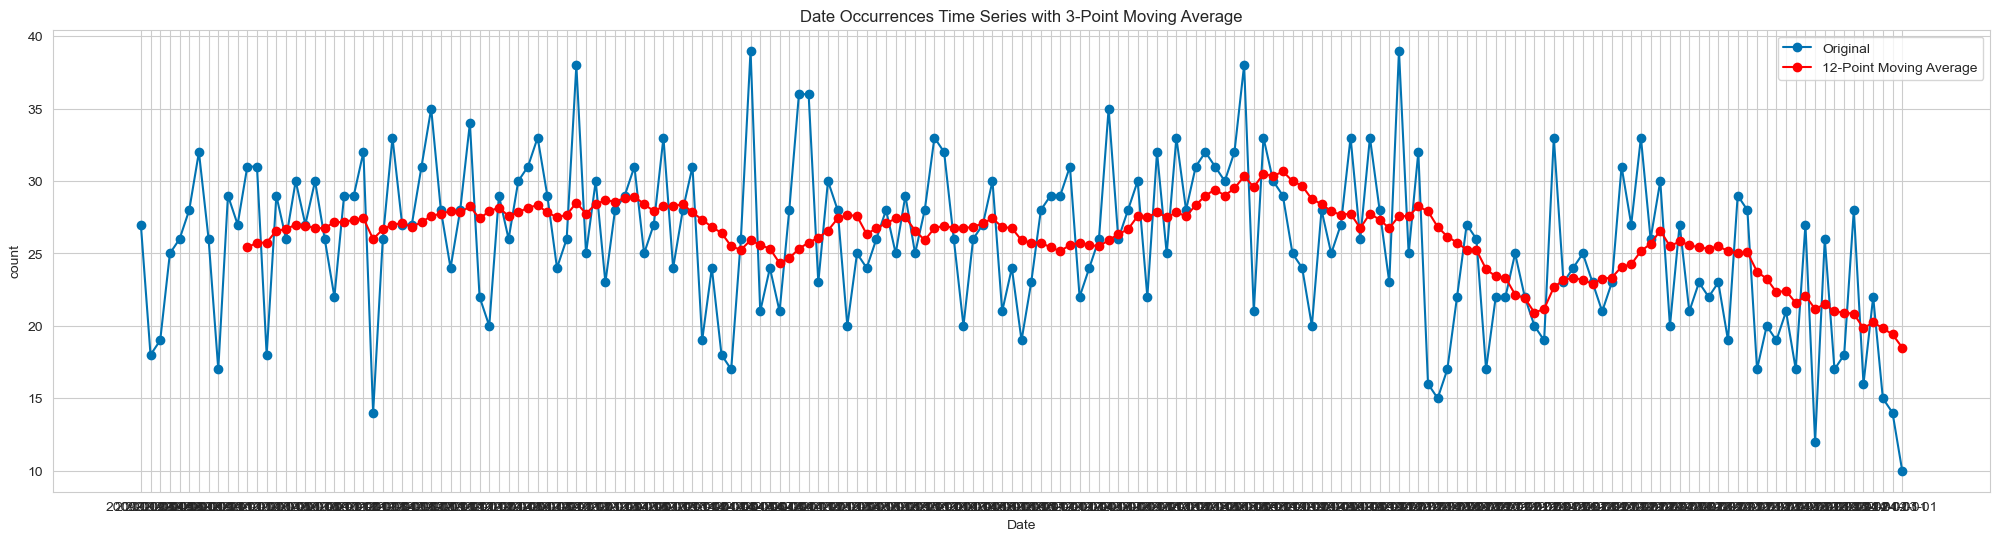

In [10]:
date_counts = fire_df.groupby('Date').size().reset_index(name='count')

# Calculate the 3-point moving average
date_counts['Moving_Average'] = date_counts['count'].rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(25, 6))
plt.plot(date_counts['Date'], date_counts['count'], label='Original', marker='o', linestyle='-')
plt.plot(date_counts['Date'], date_counts['Moving_Average'], label='12-Point Moving Average', marker='o', linestyle='-', color='red')
plt.title('Date Occurrences Time Series with 3-Point Moving Average')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot of the items ApplianceManufacturer 

plt.figure(figsize=(6, 40))

sns.countplot(data=fire_df, y='ApplianceManufacturer', color='darkred')
plt.xticks(rotation=90)
plt.title("Item first ignited")
plt.show()